# Фотометрическое определение алюминия с 8-оксихинолином

## Импорт, задание функций

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.stats import linregress
plt.rcParams['text.usetex'] = True

def f(X, A, B):
    '''
    Y = AX + B
    '''
    return A * X + B

def f_1(Y, A, B):
    '''
    Y = AX + B
    '''
    return (Y - B) / A

def subtract_baseline(signal_x, signal_y, baseline_x, baseline_y):
    """
    Subtracts the baseline from the signal after interpolating the baseline.

    Parameters:
    - signal_x: Array of x values for the signal.
    - signal_y: Array of y values for the signal.
    - baseline_x: Array of x values for the baseline.
    - baseline_y: Array of y values for the baseline.

    Returns:
    - result_y: Array of y values after subtracting the baseline from the signal.
    """
    
    # Create an interpolation function for the baseline
    interpolate_baseline = interp1d(baseline_x, baseline_y, bounds_error=False, fill_value="extrapolate")
    
    # Interpolate the baseline values at the x points of the signal
    interpolated_baseline_y = interpolate_baseline(signal_x)
    
    # Subtract the interpolated baseline from the signal
    result_y = signal_y - interpolated_baseline_y
    
    return result_y

# Example usage
if __name__ == "__main__":
    # Sample data
    signal_x = np.array([0, 1, 2, 3, 4, 5])
    signal_y = np.array([10, 12, 15, 14, 13, 20])
    
    baseline_x = np.array([0, 2, 4])
    baseline_y = np.array([5, 6, 4])
    
    result_y = subtract_baseline(signal_x, signal_y, baseline_x, baseline_y)
    
    print("Resulting Y values after subtracting baseline:", result_y)


Resulting Y values after subtracting baseline: [ 5.   6.5  9.   9.   9.  17. ]


## Спектры флюоресценции и поглощения

In [2]:
zero_trans = pd.read_csv('0_ml_trans.csv',
                   delimiter=';', decimal=',',
                   nrows=430, skiprows=[0, 1],
                   header=None, usecols=[2, 3])

trans = pd.read_csv('3ml_trans.csv',
                   delimiter=';', decimal=',',
                   nrows=330, skiprows=[0, 1],
                   header=None, usecols=[0,1])

zero_fluor = pd.read_csv('0ml_fluor.txt',
                        delimiter='\t', decimal=',',
                        nrows = 3648, skiprows=[i for i in range(17)],
                        header=None)

fluor = pd.read_csv('2_5ml_fluor.txt',
                        delimiter='\t', decimal=',',
                        nrows = 3648, skiprows=[i for i in range(17)],
                        header=None)

In [3]:
#set axes
x_trans = trans[0]
y_trans = trans[1]

x_zero_trans = zero_trans[2]
y_zero_trans = zero_trans[3]

x_fluor = fluor[0]
y_fluor = fluor[1]

x_zero_fluor = zero_fluor[0]
y_zero_fluor = zero_fluor[1]

y_tr = subtract_baseline(x_trans, y_trans, x_zero_trans, y_zero_trans)
y_tr = y_tr / np.max(y_tr)
x_tr = x_trans**(-1)*10**7

y_fl = subtract_baseline(x_fluor, y_fluor, x_zero_fluor, y_zero_fluor)
y_fl = y_fl / np.max(y_fl)
x_fl = x_fluor**(-1)*10**7

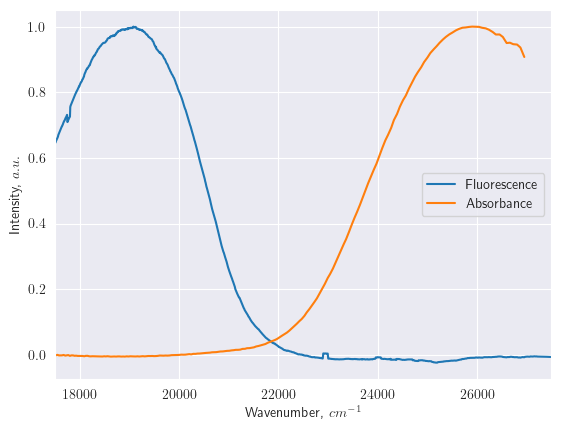

In [63]:
sns.set_style("darkgrid")
#plt.plot(x_fluor, y_fluor/np.max(y_fluor), label='Fluorescence')
#plt.plot(x_trans, y_trans/np.max(y_trans), label='Transmittance')
plt.plot(x_fl, y_fl, label='Fluorescence')
plt.plot(x_tr, y_tr, label='Absorbance')
plt.xlabel('Wavenumber, $cm^{-1}$')
plt.ylabel('Intensity, $a.u.$')
plt.legend()
plt.xlim(17500, 27500)
plt.savefig('trfl.png')

Для сравнения приведём график без вычитания базовой линии (он очень зашумлён)

In [49]:
c_std_1 = 0.114
c_std_2 = 0.114 / 100
V_cal = np.array([3.00, 2.50, 2.00, 1.50, 1.00, 0.50])
m_cal = c_std_2 * V_cal
base = 6315
I_cal = np.array([33162, 27181, 23621, 21024, 15718, 11721]) - base
m = max(I_cal)
I_ex = np.array([30013, 20048]) - base
V_ex = np.array([3.00, 2.00])
I_ex = I_ex / m
I_cal = I_cal / m

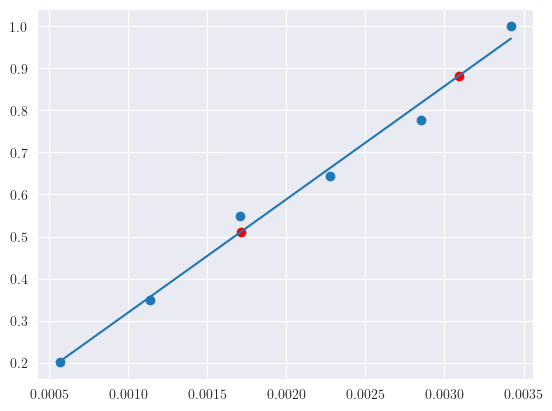

In [64]:
params = linregress(m_cal, I_cal)
m_fine = np.linspace(min(m_cal), max(m_cal), 100)
m_ex = f_1(I_ex, params[0], params[1])

plt.scatter(m_cal, I_cal)
plt.scatter(m_ex, I_ex, color='red')
plt.plot(m_fine, f(m_fine, params[0], params[1]))

In [65]:
m_ans = m_ex / V_ex * 100 * 1000 # мкг
print(f'Полученная масса {m_ans} мкг')
np.average(m_ans)

Полученная масса [103.12724557  85.75392015] мкг


94.44058286115867

## Из интереса

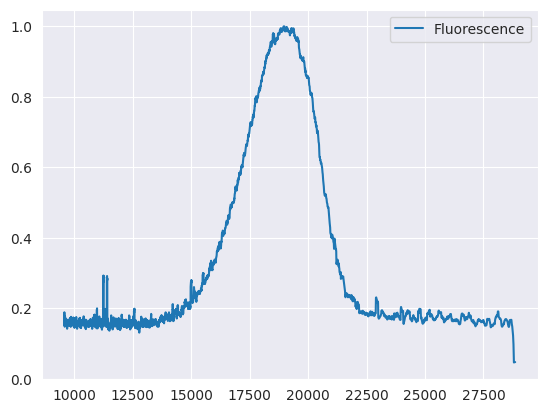

In [55]:
sns.set_style("darkgrid")
plt.plot(x_fluor**(-1)*10**7, y_fluor/np.max(y_fluor), label='Fluorescence')
plt.legend()
#plt.xlim(17500, 27500)
plt.savefig('trfl.png')